<xarray.DataArray 'msl' (time: 48)>
array([983.7167 , 983.7133 , 984.6845 , 985.58527, 986.6384 , 987.27466,
       988.4099 , 989.11816, 990.0742 , 990.096  , 990.1965 , 989.8951 ,
       989.48145, 988.3597 , 987.8724 , 986.8862 , 987.15076, 986.5464 ,
       986.5899 , 986.2249 , 985.8917 , 985.25543, 985.33746, 985.6656 ,
       985.9318 , 986.0524 , 986.01385, 986.2182 , 984.71967, 984.6929 ,
       984.4836 , 984.2475 , 984.6192 , 983.35504, 982.27344, 982.19476,
       981.247  , 979.6212 , 978.6786 , 977.6874 , 976.5137 , 975.1859 ,
       973.602  , 972.81506, 971.48895, 971.3466 , 971.60614, 971.92426],
      dtype=float32)
Coordinates:
    longitude  float32 -171.2
    latitude   float32 -85.5
  * time       (time) datetime64[ns] 2019-03-11 ... 2019-03-16T21:00:00

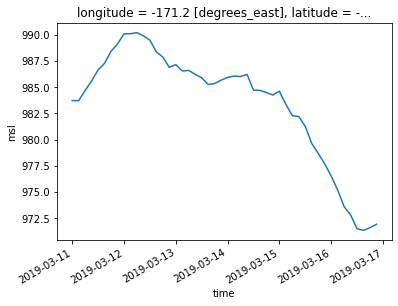

In [5]:
import xarray as xr

import numpy as np
from netCDF4 import Dataset,num2date,date2num
#ds = Dataset("/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Era_prior_events/msl_gust_10uv_Idai.nc")
ds = xr.open_dataset("/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Era_prior_events/msl_gust_10uv_Idai.nc")
#data extraction -de
de=ds.isel(latitude=-19, longitude=35)
#dp.sel(lat=20, lon=40, method='nearest').plot()
#dp[:, 20, 40]
dp = de["msl"]*0.01  # Extract data msl pressure array to hPa ~ msl/100, ie 0.01
dp.plot()
dp
#dp.close()


<xarray.DataArray (time: 48)>
array([4.238941 , 3.8717704, 3.4151514, 3.3537512, 3.520079 , 3.4644043,
       3.244346 , 3.012865 , 2.802736 , 2.6194375, 2.41515  , 2.4531105,
       2.565685 , 2.440748 , 2.5851345, 2.5574703, 2.694832 , 3.094413 ,
       3.4015205, 3.5994842, 3.644239 , 3.6023626, 3.5129306, 3.2940202,
       3.107786 , 3.099282 , 3.3279486, 3.513884 , 3.5855844, 3.624688 ,
       3.816652 , 3.9548519, 3.9379306, 4.0191007, 4.1244984, 4.270113 ,
       4.1842213, 4.0774045, 4.322153 , 4.272745 , 4.2375937, 4.2662616,
       4.1114736, 4.1648893, 4.2761536, 4.2588987, 4.4033494, 4.356033 ],
      dtype=float32)
Coordinates:
    longitude  float32 -171.2
    latitude   float32 -85.5
  * time       (time) datetime64[ns] 2019-03-11 ... 2019-03-16T21:00:00

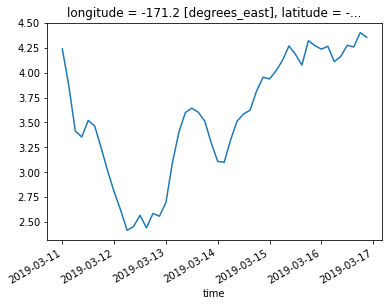

In [7]:
u = de["u10"]  # Extract ws data array 
v = de["v10"]
ws = (u**2 + v**2)**0.5
ws.plot()
ws

<xarray.DataArray 'fg10' (time: 48)>
array([7.918944, 7.296653, 6.410868, 5.789278, 5.525785, 5.135452, 4.806086,
       4.604261, 4.683449, 4.714283, 4.226542, 4.012804, 4.15226 , 4.201313,
       4.391224, 4.69256 , 4.753527, 5.216742, 5.499857, 5.938543, 5.784372,
       5.775263, 5.738121, 5.459211, 5.086397, 5.345686, 5.473928, 5.628799,
       5.89019 , 5.976385, 6.253193, 6.614796, 6.609188, 6.857264, 7.171213,
       7.71782 , 7.671569, 7.502682, 7.434706, 7.738143, 7.141781, 6.833437,
       6.462025, 6.787186, 6.842548, 7.005829, 6.994617, 7.137576],
      dtype=float32)
Coordinates:
    longitude  float32 -171.2
    latitude   float32 -85.5
  * time       (time) datetime64[ns] 2019-03-11 ... 2019-03-16T21:00:00
Attributes:
    units:      m s**-1
    long_name:  10 metre wind gust since previous post-processing

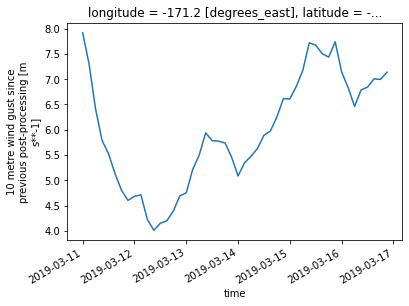

In [8]:
gs = de["fg10"]  # Extract wind gust data array 
gs.plot()
gs


48
48


/tmp/ipykernel_595/585614774.py:87: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='#666666', linestyle='-')


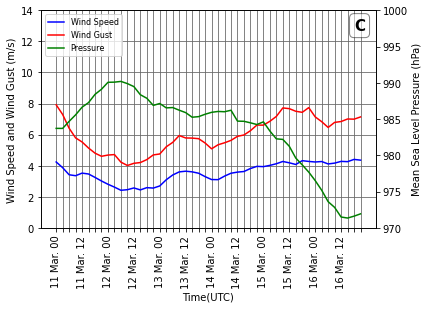

In [21]:
from scipy.io.netcdf import netcdf_file as Dataset
import numpy as np
from scipy.ndimage.filters import gaussian_filter

import matplotlib as mpl
mpl.use('agg')
from mpl_toolkits.basemap import Basemap
from scipy.io import netcdf_file as nc
from pylab import *

from datetime import datetime   ########
from datetime import timedelta  ########
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from mpl_toolkits.basemap import Basemap, addcyclic
from scipy.ndimage.filters import minimum_filter, maximum_filter

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import datetime as dt
import array as arr
from matplotlib import pyplot as plt
from matplotlib import dates
from datetime import datetime
import sys

#y1 is the wind speed
y1=np.array([4.238941 , 3.8717704, 3.4151514, 3.3537512, 3.520079 , 3.4644043,
       3.244346 , 3.012865 , 2.802736 , 2.6194375, 2.41515  , 2.4531105,
       2.565685 , 2.440748 , 2.5851345, 2.5574703, 2.694832 , 3.094413 ,
       3.4015205, 3.5994842, 3.644239 , 3.6023626, 3.5129306, 3.2940202,
       3.107786 , 3.099282 , 3.3279486, 3.513884 , 3.5855844, 3.624688 ,
       3.816652 , 3.9548519, 3.9379306, 4.0191007, 4.1244984, 4.270113 ,
       4.1842213, 4.0774045, 4.322153 , 4.272745 , 4.2375937, 4.2662616,
       4.1114736, 4.1648893, 4.2761536, 4.2588987, 4.4033494, 4.356033 ])

#y2 is wind gust
y2=np.array([7.918944, 7.296653, 6.410868, 5.789278, 5.525785, 5.135452, 4.806086,
       4.604261, 4.683449, 4.714283, 4.226542, 4.012804, 4.15226 , 4.201313,
       4.391224, 4.69256 , 4.753527, 5.216742, 5.499857, 5.938543, 5.784372,
       5.775263, 5.738121, 5.459211, 5.086397, 5.345686, 5.473928, 5.628799,
       5.89019 , 5.976385, 6.253193, 6.614796, 6.609188, 6.857264, 7.171213,
       7.71782 , 7.671569, 7.502682, 7.434706, 7.738143, 7.141781, 6.833437,
       6.462025, 6.787186, 6.842548, 7.005829, 6.994617, 7.137576])

print(y1.size)
#y3 is the convective prec
#y3=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.273411,0,0,0.0311678,0.0977459,0,0.0585246,0.0128468,0,0,0,0,0.0306632,0.0739804,0.00139572,0.0137047,0.0940926,0.0350637,0.0843377,0.119357,0.0212607,0.0755977,0.09993,0.00255984,0.00926974,0.00325832,0.000290356,0,0,0,0.00460747,0.0014869,0,0.000746002,0,0,0.00295568])


#y1 is the pressure
y3=np.array([983.7167 , 983.7133 , 984.6845 , 985.58527, 986.6384 , 987.27466,
       988.4099 , 989.11816, 990.0742 , 990.096  , 990.1965 , 989.8951 ,
       989.48145, 988.3597 , 987.8724 , 986.8862 , 987.15076, 986.5464 ,
       986.5899 , 986.2249 , 985.8917 , 985.25543, 985.33746, 985.6656 ,
       985.9318 , 986.0524 , 986.01385, 986.2182 , 984.71967, 984.6929 ,
       984.4836 , 984.2475 , 984.6192 , 983.35504, 982.27344, 982.19476,
       981.247  , 979.6212 , 978.6786 , 977.6874 , 976.5137 , 975.1859 ,
       973.602  , 972.81506, 971.48895, 971.3466 , 971.60614, 971.92426])



x1=range(0,48,1)
#print x1
x=np.array(x1)
print(x.size)
#y=np.array([2,5,3,8,1])


my_xticks = ['11 Mar. 00','','','','11 Mar. 12','','','',
	     '12 Mar. 00','','','','12 Mar. 12','','','',
	     '13 Mar. 00','','','','13 Mar. 12','','','',
	     '14 Mar. 00','','','','14 Mar. 12','','','',
	     '15 Mar. 00','','','','15 Mar. 12','','','',
	     '16 Mar. 00','','','','16 Mar. 12','','','']
#plt.plot(x, y)


fig = plt.figure()
ax1 = fig.add_subplot(111)


#fig, ax1 = plt.subplots()
plt.grid(b=True, which='major', color='#666666', linestyle='-')
# Using set_dashes() to modify dashing of an existing line
plt.xticks(x, my_xticks,rotation='vertical')

#line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
line1= ax1.plot(x, y1 , 'b',label='Wind Speed')
ax1.set_ylim(ymin=0, ymax=14)

#line3 = ax1.plot(x, y3 ,'b', label='Wind Gust')

line2 = ax1.plot(x, y2 ,'r', label='Wind Gust')
ax1.set_ylim(ymin=0, ymax=14)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
line3= ax2.plot(x, y3 , 'g',label='Pressure')
ax2.yaxis.set_major_formatter(FormatStrFormatter('%g'))
#ax2.fill_between(x, 0, y3, alpha=.7)
ax2.set_ylim(ymin=970, ymax=1000)


#ax1.legend()
ax1.set_xlabel('Time(UTC)')
ax1.set_ylabel('Wind Speed and Wind Gust (m/s)')
#ax1.set_ylabel('Wind Speed (m/s)')
ax2.set_ylabel('Mean Sea Level Pressure (hPa)')


#ax2.legend()
lns = line1 +  line2 + line3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs,loc= 'upper left',prop={'size': 8})

props1 = dict(boxstyle='round', facecolor='white', edgecolor='black',alpha=0.5)
# place a text box in upper left in axes coords
ax1.text(46,13.5,'C' , color='black',fontsize=15,weight='bold', bbox=props1,verticalalignment='top')


plt.show() 

savefig("/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Era_prior_events/msl_gust_10uv_Idai.png", bbox_inches='tight', pad_inches=.3, dpi=200)
savefig("/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Era_prior_events/msl_gust_10uv_Idai.pdf", bbox_inches='tight', pad_inches=.3, dpi=200)